In [53]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
files = sorted(glob.glob("era5_data/*"))
files

['era5_data/2m_temperature_2020.nc',
 'era5_data/2m_temperature_2021.nc',
 'era5_data/2m_temperature_2022.nc',
 'era5_data/2m_temperature_2023.nc',
 'era5_data/2m_temperature_2024.nc',
 'era5_data/total_precipitation_2020.nc',
 'era5_data/total_precipitation_2021.nc',
 'era5_data/total_precipitation_2022.nc',
 'era5_data/total_precipitation_2023.nc',
 'era5_data/total_precipitation_2024.nc']

In [4]:
prec_ds = xr.open_dataset(files[5])
temp_ds = xr.open_dataset(files[0])

In [6]:
prec_ds8 = prec_ds.copy(deep=True)
prec_ds8 = prec_ds8.resample({"time": "8D"}).mean()
temp_ds8 = temp_ds.copy(deep=True)
temp_ds8 = temp_ds8.resample({"time": "8D"}).mean()
prec_ds8

<xarray.Dataset> Size: 2MB
Dimensions:    (longitude: 202, latitude: 43, time: 27)
Coordinates:
  * longitude  (longitude) float32 808B -143.2 -143.0 -142.7 ... -93.23 -92.98
  * latitude   (latitude) float32 172B 59.98 59.73 59.48 ... 49.98 49.73 49.48
  * time       (time) datetime64[ns] 216B 2020-03-01 2020-03-09 ... 2020-09-25
Data variables:
    tp         (time, latitude, longitude) float64 2MB 0.000497 ... 7.78e-05
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-14 23:23:35 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [32]:
prec_arr = np.array(prec_ds.to_array()[0])
prec_arr = prec_arr.reshape(prec_arr.shape[0] * prec_arr.shape[1], prec_arr.shape[2])
temp_arr = np.array(temp_ds.to_array()[0])
temp_arr = temp_arr.reshape(temp_arr.shape[0] * temp_arr.shape[1], temp_arr.shape[2])

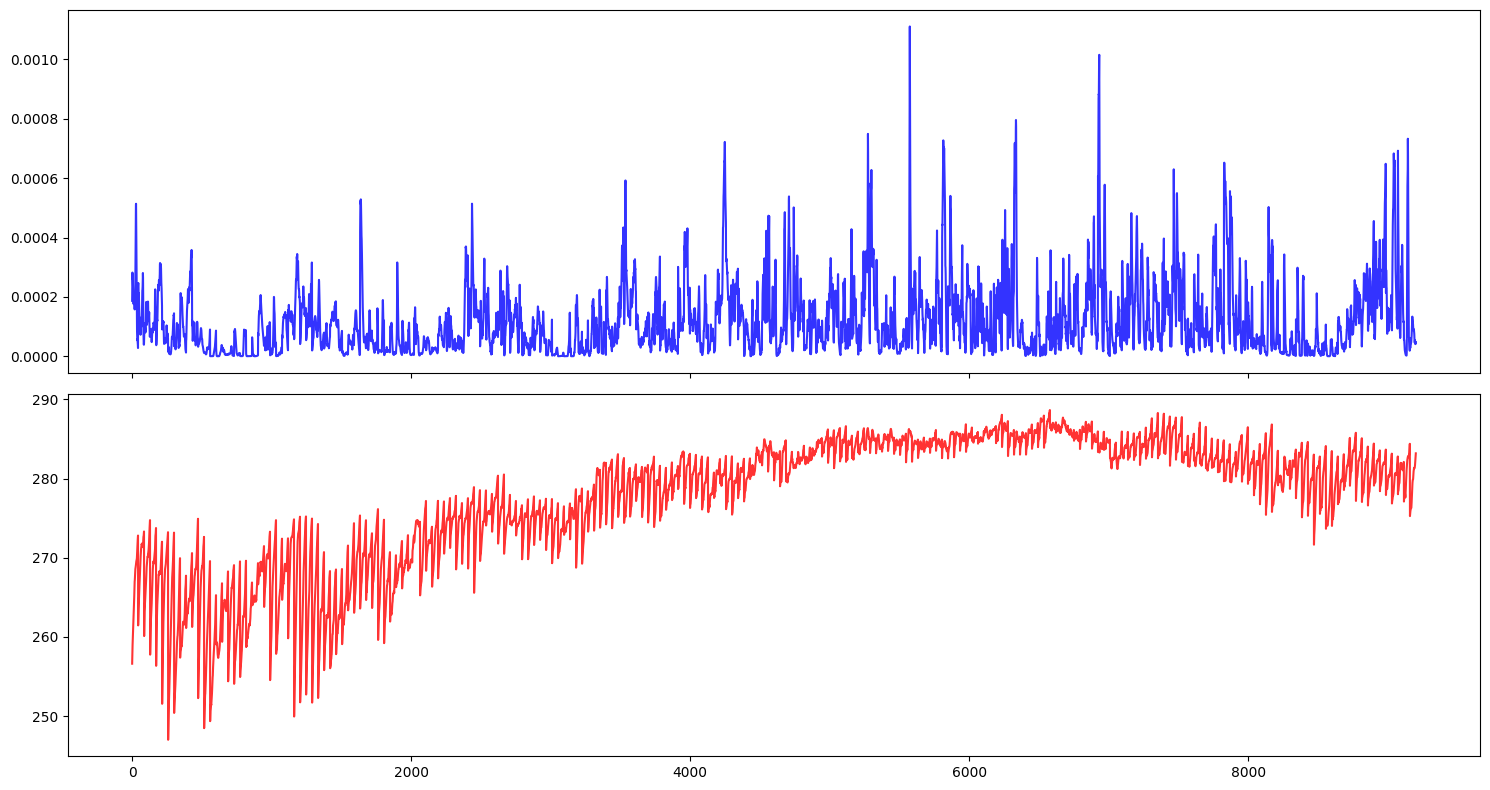

In [34]:
fig, axes = plt.subplots(2, figsize=(15, 8), sharex=True)
axes[0].plot(np.mean(prec_arr, axis=1), color="blue", alpha=0.8)
axes[1].plot(np.mean(temp_arr, axis=1), color="red", alpha=0.8)
plt.tight_layout()
plt.show()

In [35]:
prec8_arr = np.array(prec_ds8.to_array()[0])
prec8_arr = prec8_arr.reshape(
    prec8_arr.shape[0] * prec8_arr.shape[1], prec8_arr.shape[2]
)
temp8_arr = np.array(temp_ds8.to_array()[0])
temp8_arr = temp8_arr.reshape(
    temp8_arr.shape[0] * temp8_arr.shape[1], temp8_arr.shape[2]
)

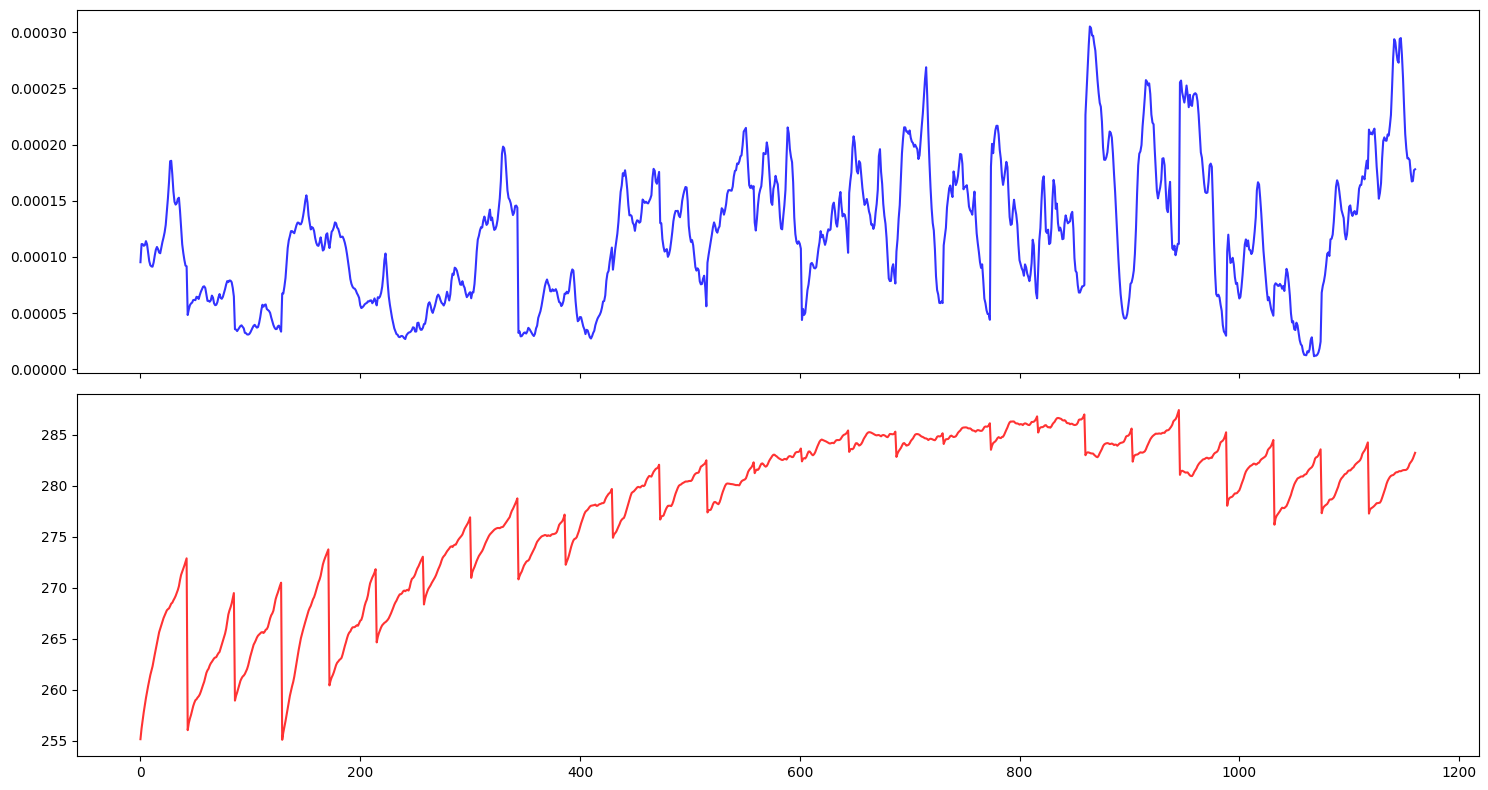

In [42]:
fig, axes = plt.subplots(2, figsize=(15, 8), sharex=True)
axes[0].plot(np.mean(prec8_arr, axis=1), color="blue", alpha=0.8)
axes[1].plot(np.mean(temp8_arr, axis=1), color="red", alpha=0.8)
plt.tight_layout()
plt.show()

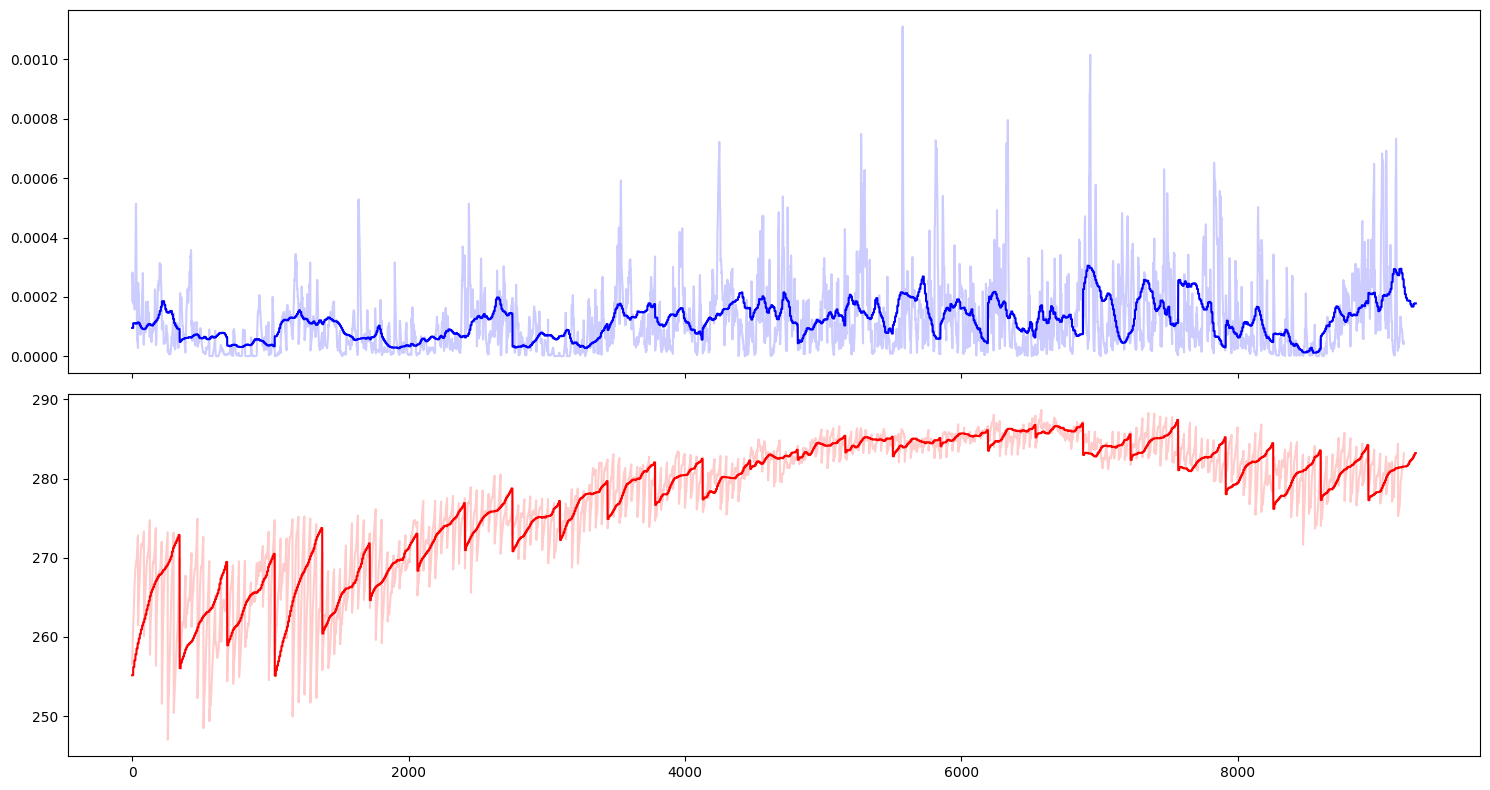

In [45]:
fig, axes = plt.subplots(2, figsize=(15, 8), sharex=True)
axes[0].plot(np.repeat(np.mean(prec8_arr, axis=1), 8), color="blue", alpha=1)
axes[0].plot(np.mean(prec_arr, axis=1), color="blue", alpha=0.2)
axes[1].plot(np.repeat(np.mean(temp8_arr, axis=1), 8), color="red", alpha=1)
axes[1].plot(np.mean(temp_arr, axis=1), color="red", alpha=0.2)
plt.tight_layout()
plt.show()

In [46]:
def normalize_data(data):
    return (data - np.mean(data)) / np.std(data)

In [47]:
prec_arr = normalize_data(prec_arr)
temp_arr = normalize_data(temp_arr)

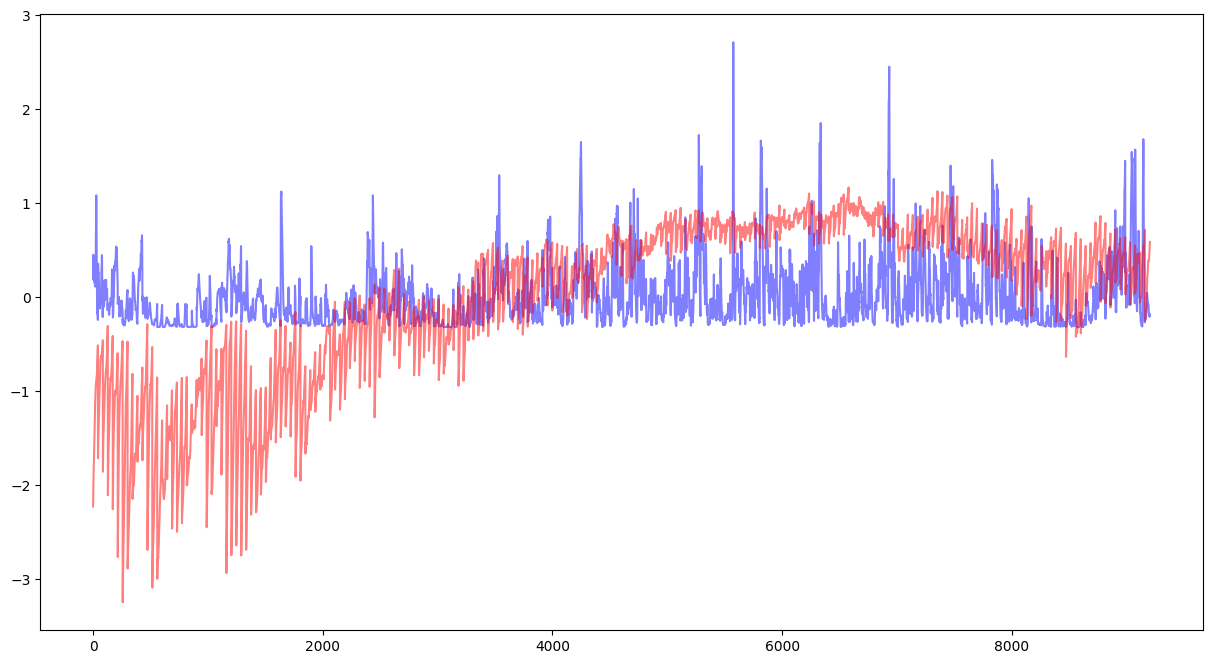

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(np.mean(prec_arr, axis=1), color="blue", alpha=0.5)
plt.plot(np.mean(temp_arr, axis=1), color="red", alpha=0.5)
plt.show()

In [49]:
prec8_arr = normalize_data(prec8_arr)
temp8_arr = normalize_data(temp8_arr)

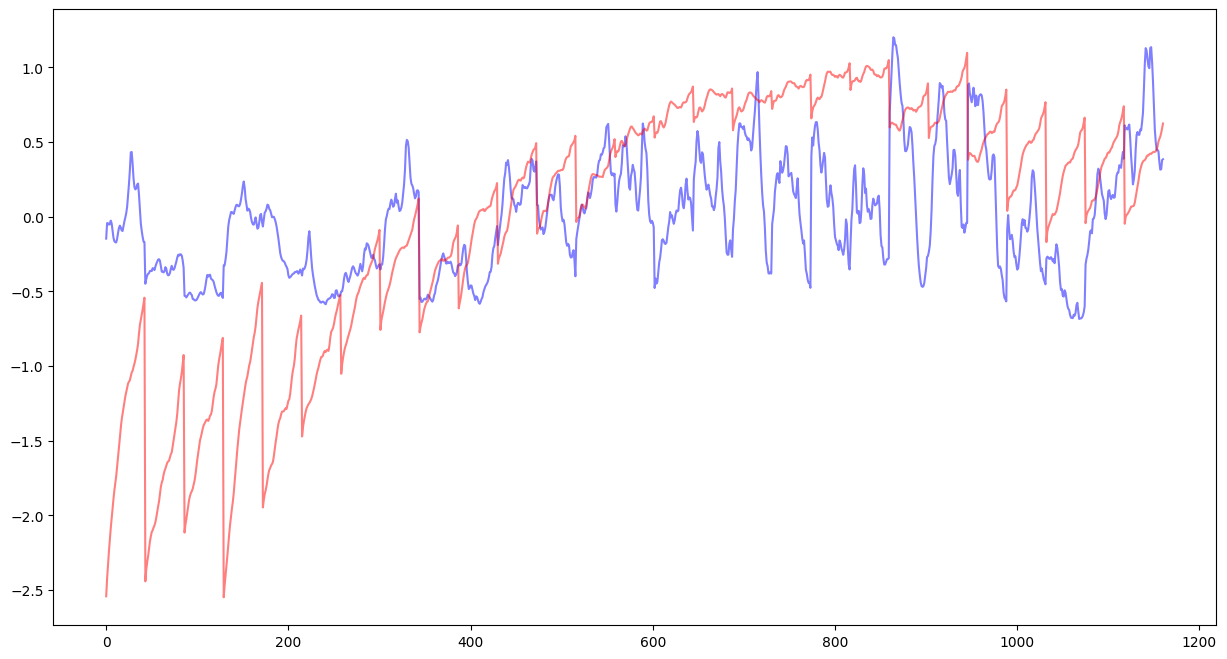

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(np.mean(prec8_arr, axis=1), color="blue", alpha=0.5)
plt.plot(np.mean(temp8_arr, axis=1), color="red", alpha=0.5)
plt.show()

In [59]:
def preprocess_era5_data(file_path, path_out):
    ds = xr.open_dataset(file_path)
    ds = ds.resample({"time": "8D"}).mean()
    arr = np.array(ds.to_array()[0])
    arr = normalize_data(arr)
    np.save(path_out, arr)

In [54]:
base_path_out = "era5_data/normalized_arrays"
os.makedirs(base_path_out, exist_ok=True)

In [66]:
for file in files:
    path_out = os.path.join(base_path_out, file.split("/")[1].replace(".nc", ".npy"))
    print(file, path_out)
    preprocess_era5_data(file, path_out)

era5_data/2m_temperature_2020.nc era5_data/normalized_arrays/2m_temperature_2020.npy
era5_data/2m_temperature_2021.nc era5_data/normalized_arrays/2m_temperature_2021.npy
era5_data/2m_temperature_2022.nc era5_data/normalized_arrays/2m_temperature_2022.npy
era5_data/2m_temperature_2023.nc era5_data/normalized_arrays/2m_temperature_2023.npy
era5_data/2m_temperature_2024.nc era5_data/normalized_arrays/2m_temperature_2024.npy
era5_data/total_precipitation_2020.nc era5_data/normalized_arrays/total_precipitation_2020.npy
era5_data/total_precipitation_2021.nc era5_data/normalized_arrays/total_precipitation_2021.npy
era5_data/total_precipitation_2022.nc era5_data/normalized_arrays/total_precipitation_2022.npy
era5_data/total_precipitation_2023.nc era5_data/normalized_arrays/total_precipitation_2023.npy
era5_data/total_precipitation_2024.nc era5_data/normalized_arrays/total_precipitation_2024.npy


In [68]:
sample_out = np.load(path_out)
sample_out.shape

(9, 43, 202)